# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv). 

### Step 3. Assign it to a variable called online_rt
Note: if you receive a utf-8 decode error, set `encoding = 'latin1'` in `pd.read_csv()`.

In [3]:
online_rt = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv', encoding = 'latin1')
online_rt.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
387447,570288,21034,REX CASH+CARRY JUMBO SHOPPER,1,10/10/11 11:47,0.95,16960.0,United Kingdom
344473,567074,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,4,9/16/11 12:22,2.95,17068.0,United Kingdom
12311,537374,72799F,IVORY PILLAR CANDLE GOLD FLOCK,2,12/6/10 12:55,2.95,17259.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_7228\3396303329.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d = online_rt.groupby('Country').sum()


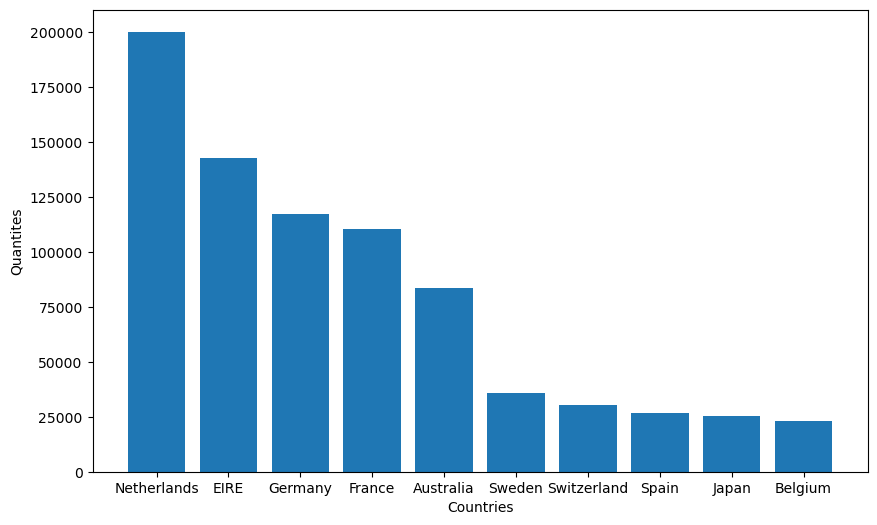

In [18]:
d = online_rt.groupby('Country').sum()
d = d.sort_values(by = 'Quantity', ascending=False)[1:11]

plt.figure(figsize=(10,6))
plt.bar(d.index, d['Quantity'])
plt.xlabel('Countries')
plt.ylabel('Quantites')
plt.show()

### Step 5.  Exclude negative Quantity entries

In [19]:
online_rt = online_rt[online_rt['Quantity'] >= 0]

### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_7228\229332678.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d = online_rt.groupby(['CustomerID', 'Country']).sum()


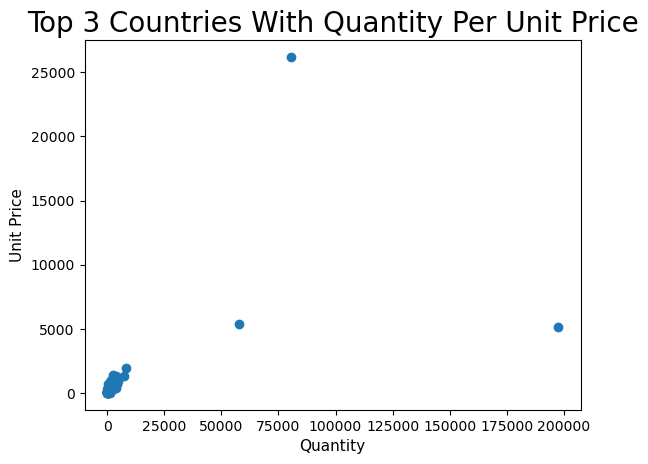

In [25]:
d = online_rt.groupby(['CustomerID', 'Country']).sum()
d = d[d['UnitPrice'] > 0]
d['Country'] = d.index.get_level_values(1) 
top_countries =  ['Netherlands', 'EIRE', 'Germany']
d = d[d['Country'].isin(top_countries)]

plt.scatter(d['Quantity'], d['UnitPrice'])
plt.title('Top 3 Countries With Quantity Per Unit Price', fontdict={'fontsize' : 20})
plt.xlabel('Quantity', fontdict={'fontsize' : 11})
plt.ylabel('Unit Price', fontdict={'fontsize' : 11})
plt.show()

### Step 7. Investigate why the previous results look so uninformative.

This section might seem a bit tedious to go through. But I've thought of it as some kind of a simulation of problems one might encounter when dealing with data and other people. Besides there is a prize at the end (i.e. Section 8).

(But feel free to jump right ahead into Section 8 if you want; it doesn't require that you finish this section.)

#### Step 7.1 Look at the first line of code in Step 6. And try to figure out if it leads to any kind of problem.
##### Step 7.1.1 Display the first few rows of that DataFrame.

In [35]:
d = online_rt.groupby(['CustomerID', 'Country']).sum()
d.head()

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_7228\1791148644.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d = online_rt.groupby(['CustomerID', 'Country']).sum()


,,Quantity,UnitPrice
CustomerID,Country,,
12346.0,United Kingdom,74215,1.04
12347.0,Iceland,2458,481.21
12348.0,Finland,2341,178.71
12349.0,Italy,631,605.10
12350.0,Norway,197,65.30


##### Step 7.1.2 Think about what that piece of code does and display the dtype of `UnitPrice`

In [36]:
d['UnitPrice'].dtype

dtype('float64')

##### Step 7.1.3 Pull data from `online_rt`for `CustomerID`s 12346.0 and 12347.0.

In [37]:
online_rt[(online_rt['CustomerID'] == 12346.0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom


In [38]:
online_rt[(online_rt['CustomerID'] == 12347.0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/10 14:57,2.10,12347.0,Iceland
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/10 14:57,4.25,12347.0,Iceland
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/10 14:57,3.25,12347.0,Iceland
14941,537626,22492,MINI PAINT SET VINTAGE,36,12/7/10 14:57,0.65,12347.0,Iceland
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,12/7/10 14:57,1.25,12347.0,Iceland
...,...,...,...,...,...,...,...,...
535010,581180,20719,WOODLAND CHARLOTTE BAG,10,12/7/11 15:52,0.85,12347.0,Iceland
535011,581180,21265,PINK GOOSE FEATHER TREE 60CM,12,12/7/11 15:52,1.95,12347.0,Iceland
535012,581180,23271,CHRISTMAS TABLE SILVER CANDLE SPIKE,16,12/7/11 15:52,0.83,12347.0,Iceland
535013,581180,23506,MINI PLAYING CARDS SPACEBOY,20,12/7/11 15:52,0.42,12347.0,Iceland


#### Step 7.2 Reinterpreting the initial problem.

To reiterate the question that we were dealing with:  
"Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries"

The question is open to a set of different interpretations.
We need to disambiguate.

We could do a single plot by looking at all the data from the top 3 countries.
Or we could do one plot per country. To keep things consistent with the rest of the exercise,
let's stick to the latter oprion. So that's settled.

But "top 3 countries" with respect to what? Two answers suggest themselves:
Total sales volume (i.e. total quantity sold) or total sales (i.e. revenue).
This exercise goes for sales volume, so let's stick to that.

##### Step 7.2.1 Find out the top 3 countries in terms of sales volume.

In [40]:
online_rt.groupby('Country').Quantity.sum().sort_values(ascending=False)[0:3]

Country
United Kingdom    4733819
Netherlands        200937
EIRE               147447
Name: Quantity, dtype: int64

##### Step 7.2.2 

Now that we have the top 3 countries, we can focus on the rest of the problem:  
"Quantity per UnitPrice by CustomerID".  
We need to unpack that.

"by CustomerID" part is easy. That means we're going to be plotting one dot per CustomerID's on our plot. In other words, we're going to be grouping by CustomerID.

"Quantity per UnitPrice" is trickier. Here's what we know:  
*One axis will represent a Quantity assigned to a given customer. This is easy; we can just plot the total  Quantity for each customer.  
*The other axis will represent a UnitPrice assigned to a given customer. Remember a single customer can have any number of orders with different prices, so summing up prices isn't quite helpful. Besides it's not quite clear what we mean when we say "unit price per customer"; it sounds like price of the customer! A reasonable alternative is that we assign each customer the average amount each has paid per item. So let's settle that question in that manner.

#### Step 7.3 Modify, select and plot data
##### Step 7.3.1 Add a column to online_rt called `Revenue` calculate the revenue (Quantity * UnitPrice) from each sale.
We will use this later to figure out an average price per customer.

In [41]:
online_rt['Revenue'] = online_rt['Quantity'] * online_rt['UnitPrice']
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


##### Step 7.3.2 Group by `CustomerID` and `Country` and find out the average price (`AvgPrice`) each customer spends per unit.

In [48]:
x = online_rt.groupby(['CustomerID','Country'])
x2 = x['Quantity','Revenue'].agg('sum')
x2['AvgPrice'] = x2.Revenue / x2.Quantity
x2.head()

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_7228\2902840050.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  x2 = x['Quantity','Revenue'].agg('sum')


,,Quantity,Revenue,AvgPrice
CustomerID,Country,,,
12346.0,United Kingdom,74215,77183.60,1.040000
12347.0,Iceland,2458,4310.00,1.753458
12348.0,Finland,2341,1797.24,0.767723
12349.0,Italy,631,1757.55,2.785341
12350.0,Norway,197,334.40,1.697462


##### Step 7.3.3 Plot

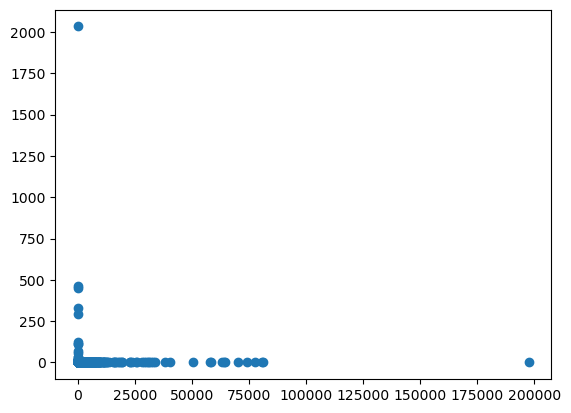

In [49]:
plt.scatter(x2.Quantity, x2.AvgPrice)